In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
districts = pd.read_csv("chicago-police-data/data/context_data/district_demographics/Districts.csv")
districts

,District_No,District_Name,Population,Latino,White,Black,Native_American,Asian,Other,Latino%,White%,Black%,Native_American%,Asian%,Other%,Majority
0,1,Central,"62,781","3,766","32,952","13,452",95,"10,790","1,726",6%,52%,21%,0%,17%,3%,White
1,2,Wentworth,"95,439","3,242","17,747","65,993",138,"5,837","2,482",3%,19%,69%,0%,6%,3%,Black
2,3,Grand Crossing,"75,235","1,123","1,472","71,010",169,312,"1,149",1%,2%,94%,0%,0%,2%,Black
3,4,South Chicago,"123,575","35,381","9,925","76,399",223,258,"1,389",29%,8%,62%,0%,0%,1%,Black
4,5,Calumet,"74,396","2,524",843,"70,064",118,38,809,3%,1%,94%,0%,0%,1%,Black
5,6,Gresham,"90,841",914,312,"88,525",164,61,865,1%,0%,97%,0%,0%,1%,Black
6,7,Englewood,"71,071","1,167",262,"68,787",136,56,663,2%,0%,97%,0%,0%,1%,Black
7,8,Chicago Lawn,"247,373","139,854","51,491","52,219",247,"2,001","1,561",57%,21%,21%,0%,1%,1%,Latino
8,9,Deering,"165,201","94,610","24,307","19,044",173,"25,894","1,173",57%,15%,12%,0%,16%,1%,Latino
9,10,Ogden,"118,093","73,441","4,300","39,440",144,239,529,62%,4%,33%,0%,0%,0%,Latino


In [77]:
compiled_officer_df = pd.read_csv("chicago-police-data/data/unified_data/profiles/officer-profiles.csv")
compiled_officer_df = compiled_officer_df[["race", "gender"]]
compiled_officer_df.dropna(subset = ["race"], inplace = True)
races = compiled_officer_df["race"].unique()
races

array(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN/PACIFIC ISLANDER',
       'NATIVE AMERICAN/ALASKAN NATIVE'], dtype=object)

Text(0.5, 1.0, 'Race Distribution of Chicago PD')

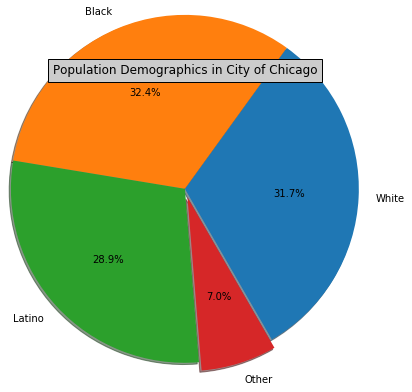

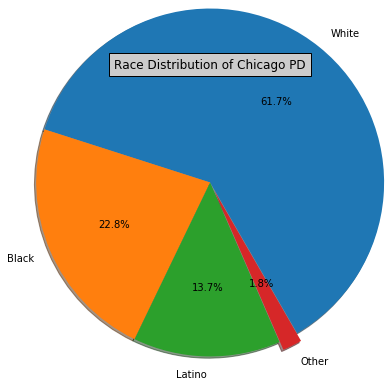

In [105]:



chicago_tot_pop = sum([int(i.replace(",","")) for i in list(districts["Population"])])
chicago_white_pop = sum([int(i.replace(",","")) for i in list(districts["White"])])
chicago_black_pop = sum([int(i.replace(",","")) for i in list(districts["Black"])])
chicago_latino_pop = sum([int(i.replace(",","")) for i in list(districts["Latino"])])
chicago_asian_pop = sum([int(i.replace(",","")) for i in list(districts["Asian"])])
chicago_other_pop = sum(districts['Native_American']) + sum([int(i.replace(",","")) for i in list(districts["Other"])])
chicago_pop = [chicago_white_pop, chicago_black_pop, chicago_latino_pop, chicago_asian_pop + chicago_other_pop]
chicago_pop_prop = [i/chicago_tot_pop for i in chicago_pop]
chicago_labels = ("White", "Black", "Latino", "Other")
sizes_chicago = chicago_pop_prop
explode = (0, 0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes_chicago, explode = explode, labels = chicago_labels, autopct='%1.1f%%', shadow=True, startangle=300, radius = 2)
plt.title("Population Demographics in City of Chicago", bbox={'facecolor':'0.8', 'pad':5})


race_count = [len(compiled_officer_df.loc[compiled_officer_df["race"] == i]) for i in races]
race_count_prop = [(i/sum(race_count)) * 100 for i in race_count]
police_labels = ("White", "Black", "Latino", "Other")
sizes_police = [race_count[0], race_count[1], race_count[2], race_count[3] + race_count[4]]
explode = (0, 0 , 0, 0.1 )
fig1, ax1 = plt.subplots()
ax1.pie(sizes_police, explode = explode, labels = police_labels, autopct='%1.1f%%', shadow=True, startangle=300, radius = 2)
plt.title("Race Distribution of Chicago PD", bbox={'facecolor':'0.8', 'pad':5})

In [100]:
len(labels)

2

In [92]:
int('1,000,000'.replace(',',''))

1000000

In [89]:
list(districts["Population"])

['62,781',
 '95,439',
 '75,235',
 '123,575',
 '74,396',
 '90,841',
 '71,071',
 '247,373',
 '165,201',
 '118,093',
 '70,474',
 '127,869',
 '117,738',
 '59,458',
 '199,482',
 '144,096',
 '117,041',
 '200,786',
 '91,279',
 '101,941',
 '141,038',
 '200,391']

In [ ]:
labels = ("No Action or Reprimand", "Suspension/Reprimand/Termination")
sizes = [no_act_prop, suspensions_prop]
explode = (0.75, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = ['orange', 'red'], autopct='%1.1f%%', shadow=True, startangle=300, radius = 2)
plt.title("Outcomes of Complaints of Excessive Force", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


In [12]:
officer_df = pd.read_csv("complaints_and_years_served_merged.csv")
officer_df

,Unnamed: 0,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served,victim_gender,victim_race
0,0,100527,1005434,UN,ALFONZA,WYSINGER,NaN,BLACK,MALE,29.25,MALE,WHITE
1,1,100527,1005434,UN,ALFONZA,WYSINGER,NaN,BLACK,MALE,29.25,MALE,WHITE
2,2,111051,1005434,UN,JACKIE,CAMPBELL,NaN,BLACK,FEMALE,26.09,MALE,WHITE
3,3,111051,1005434,UN,JACKIE,CAMPBELL,NaN,BLACK,FEMALE,26.09,MALE,WHITE
4,4,102914,1031317,NS,CALVIN,GOUSMAN,A,BLACK,MALE,27.71,MALE,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...
15379,15379,114956,1080062,NAF,JONATHAN,ROGERS,L,WHITE,MALE,3.43,MALE,BLACK
15380,15380,114956,1080062,NAF,JONATHAN,ROGERS,L,WHITE,MALE,3.43,MALE,BLACK
15381,15381,104713,1080340,NAF,DALLAS,ARAMBURU,P,HISPANIC,FEMALE,3.40,FEMALE,BLACK
15382,15382,104873,1081013,NaN,DANIEL,DUFRENE,,BLACK,MALE,0.41,FEMALE,WHITE


In [7]:
force_df = pd.read_csv("chicago-police-data/data/unified_data/complaints/complaints-accused.csv")
force_df

,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
0,130469.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0
1,103495.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,7727.0
2,111845.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,17149.0
3,126148.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,271.0
4,127906.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,11004.0
...,...,...,...,...,...,...,...,...,...,...
244431,117294.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080732,3,NS,NaN,NaN,NaN,29814.0
244432,107250.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,2909.0
244433,111277.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,3045.0
244434,128170.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,3,UN,NaN,NaN,NaN,4550.0


In [9]:
df = pd.read_csv("chicago-police-data/data/unified_data/complaints/complaints-victims.csv")
df

,age,birth_year,cr_id,cv,gender,race
0,24.0,NaN,1000551,2,MALE,BLACK
1,51.0,NaN,1000861,2,FEMALE,BLACK
2,NaN,NaN,1001509,2,MALE,WHITE
3,NaN,NaN,1001880,2,FEMALE,BLACK
4,NaN,NaN,1003246,2,MALE,HISPANIC
...,...,...,...,...,...,...
124516,NaN,1970.0,1088157,3,MALE,BLACK
124517,NaN,1989.0,1087109,3,FEMALE,BLACK
124518,NaN,1958.0,1084557,3,MALE,BLACK
124519,NaN,NaN,1088434,3,FEMALE,BLACK


In [10]:
force_df.loc[force_df["cr_id"].isin(df["cr_id"])]

,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
150900,120840.0,ILLEGAL ARREST,03D,1000258,2,UN,No Action Taken,UN,No Action Taken,22414.0
150901,101162.0,ILLEGAL ARREST,03D,1000258,2,UN,No Action Taken,UN,No Action Taken,9389.0
150902,105539.0,ILLEGAL ARREST,03D,1000258,2,UN,No Action Taken,UN,No Action Taken,7423.0
150903,108963.0,ILLEGAL ARREST,03D,1000258,2,UN,No Action Taken,UN,No Action Taken,22074.0
150904,105464.0,ILLEGAL ARREST,03D,1000258,2,UN,No Action Taken,UN,No Action Taken,2144.0
...,...,...,...,...,...,...,...,...,...,...
244431,117294.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080732,3,NS,NaN,NaN,NaN,29814.0
244432,107250.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,2909.0
244433,111277.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,3045.0
244434,128170.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,3,UN,NaN,NaN,NaN,4550.0


In [25]:
inner_join = pd.merge(force_df, df, how = "outer", on = ["cr_id"])[["UID", "complaint_category", "complaint_code", "cr_id", "final_finding", "final_outcome", "link_UID", "gender", "race"] ]
inner_join

,UID,complaint_category,complaint_code,cr_id,final_finding,final_outcome,link_UID,gender,race
0,130469.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,NS,NO ACTION TAKEN,20040.0,NaN,NaN
1,103495.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,7727.0,NaN,NaN
2,111845.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,17149.0,NaN,NaN
3,126148.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,271.0,NaN,NaN
4,127906.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,11004.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
371182,NaN,NaN,NaN,1088167,NaN,NaN,NaN,MALE,WHITE
371183,NaN,NaN,NaN,1088170,NaN,NaN,NaN,MALE,BLACK
371184,NaN,NaN,NaN,1088166,NaN,NaN,NaN,MALE,BLACK
371185,NaN,NaN,NaN,1088165,NaN,NaN,NaN,FEMALE,BLACK


In [28]:
excess_force = inner_join.loc[inner_join["complaint_code"] == "05A"].dropna(subset = ["final_finding"])
excess_force

,UID,complaint_category,complaint_code,cr_id,final_finding,final_outcome,link_UID,gender,race
1,103495.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,7727.0,NaN,NaN
2,111845.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,17149.0,NaN,NaN
3,126148.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,271.0,NaN,NaN
4,127906.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,NS,NO ACTION TAKEN,11004.0,NaN,NaN
227,113753.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C221987,NS,NO ACTION TAKEN,9102.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
300431,117294.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080732,NS,NaN,29814.0,MALE,BLACK
300434,128170.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,UN,NaN,4550.0,FEMALE,WHITE
300435,128170.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,UN,NaN,4550.0,FEMALE,WHITE
300436,130065.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,UN,NaN,26387.0,FEMALE,WHITE


In [33]:
excess_force["final_outcome"].unique()

array(['NO ACTION TAKEN', 'REINSTATED POLICE BD', '30 DAY SUSPENSION',
       'RESIGNED -NOT SERVED', '5 DAY SUSPENSION', '2 DAY SUSPENSION',
       'SUSPENDED OVR 30 DAY', 'SEPARATION', '1 DAY SUSPENSION',
       'REPRIMAND', '3 DAY SUSPENSION', '20 DAY SUSPENSION',
       '10 DAY SUSPENSION', '15 DAY SUSPENSION', '**PENALTY NOT SERVED',
       '6 DAY SUSPENSION', 'SUSTAINED-NO PENALTY', '4 DAY SUSPENSION',
       '7 DAY SUSPENSION', 'REINSTATED COURT ACT', 'ADMIN. TERMINATION',
       '8 DAY SUSPENSION', 'No Action Taken', '1 Day Suspension',
       'Reprimand', '5 Day Suspension', 'Unknown', '3 Day Suspension',
       'Penalty Not Served', '10 Day Suspension', '2 Day Suspension',
       'Separation', '15 Day Suspension', 'Suspended over 30 Days',
       '4 Day Suspension', '20 Day Suspension', '8 Day Suspension',
       'Resigned', '999', '7 Day Suspension', 'Violation Noted',
       '45 Day Suspension', '30 Day Suspension',
       'Reinstated by Court Action', 'Reinstated by Police

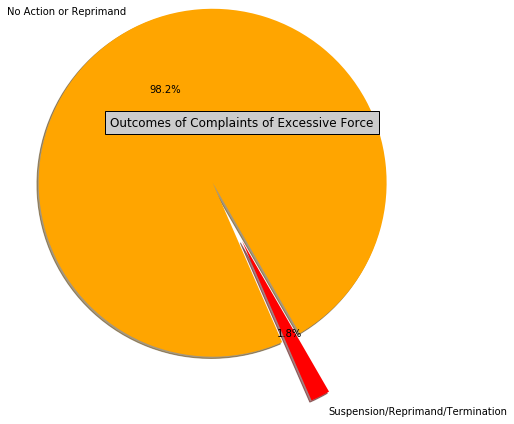

In [69]:
excess_force.dropna(subset = ["final_outcome"], inplace = True)
no_act = ["NO ACTION TAKEN", "No Action Taken"]

suspensions = [i for i in excess_force["final_outcome"].unique() if i not in no_act]
total_excess = len(excess_force)
no_act_prop = (len(excess_force.loc[excess_force["final_outcome"].isin(no_act)])/total_excess) * 100
suspensions_prop = (len(excess_force.loc[excess_force["final_outcome"].isin(suspensions)])/total_excess) * 100
labels = ("No Action or Reprimand", "Suspension/Reprimand/Termination")
sizes = [no_act_prop, suspensions_prop]
explode = (0.75, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = ['orange', 'red'], autopct='%1.1f%%', shadow=True, startangle=300, radius = 2)
plt.title("Outcomes of Complaints of Excessive Force", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

#MAKE PLOT LESS UGLY